# Collision Avoidance Challenge - Notebook 00

This notebook is my first attempt to examine the data in [the ESA Collision Avoidance Challenge](https://kelvins.esa.int/collision-avoidance-challenge/home).

Let's start with the standard imports, then load the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# FIXME: Figure out difference between "notebook" and "inline"
%matplotlib inline

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [0]:
training_url = "https://gitlab.com/saintaardvark/collision_avoidance_challenge/raw/master/data/train_data.zip"
training_df = df1 = pd.read_csv(training_url)

# Another option; https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
training_df.head()

event_id  time_to_tca  mission_id       risk  ...   F10   F3M   SSN    AP
0         0     1.566798           5 -10.204955  ...  89.0  83.0  42.0  11.0
1         0     1.207494           5 -10.355758  ...  89.0  83.0  42.0  11.0
2         0     0.952193           5 -10.345631  ...  89.0  83.0  42.0  11.0
3         0     0.579669           5 -10.337809  ...  89.0  83.0  40.0  14.0
4         0     0.257806           5 -10.391260  ...  89.0  83.0  40.0  14.0

[5 rows x 103 columns]

Let's start examining the data.

What buckets of risk do we have?

In [4]:
print(training_df.describe().transpose())

                      count         mean  ...          75%           max
event_id           162634.0  6566.871798  ...  9867.000000  13153.000000
time_to_tca        162634.0     3.350190  ...     5.083665      6.993832
mission_id         162634.0     7.117786  ...     9.000000     24.000000
risk               162634.0   -19.340603  ...    -9.173294     -1.442854
max_risk_estimate  162634.0    -6.282332  ...    -5.620559     -1.082442
...                     ...          ...  ...          ...           ...
c_sigma_ndot       153393.0  1127.809273  ...     0.167667  79053.661498
F10                155812.0    78.095853  ...    80.000000    246.000000
F3M                155812.0    79.049085  ...    82.000000    159.000000
SSN                155812.0    20.589480  ...    30.000000    172.000000
AP                 155812.0     8.608034  ...    10.000000    108.000000

[102 rows x 8 columns]


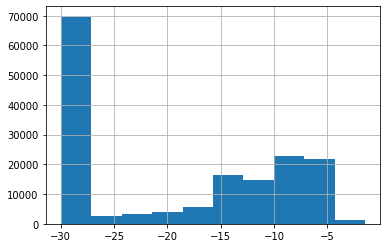

In [5]:
training_df.risk.hist()

How does risk vary with `time_to_tca` (time to time of closest approach)?

**FIXME:** Consider making this and the next plot with seaborn.

In [6]:
risky_df = training_df[training_df.risk > -5]
plt.scatter((risky_df.time_to_tca - 7), risky_df.risk, label=risky_df['mission_id'])

That's not very easy to decipher.  Maybe if we plot risk over time_to_tca, coloured by event_id, we'll get a better picture.

In [7]:
# How many event_ids do we have in the risky_df?
len(risky_df['event_id'].unique())

665

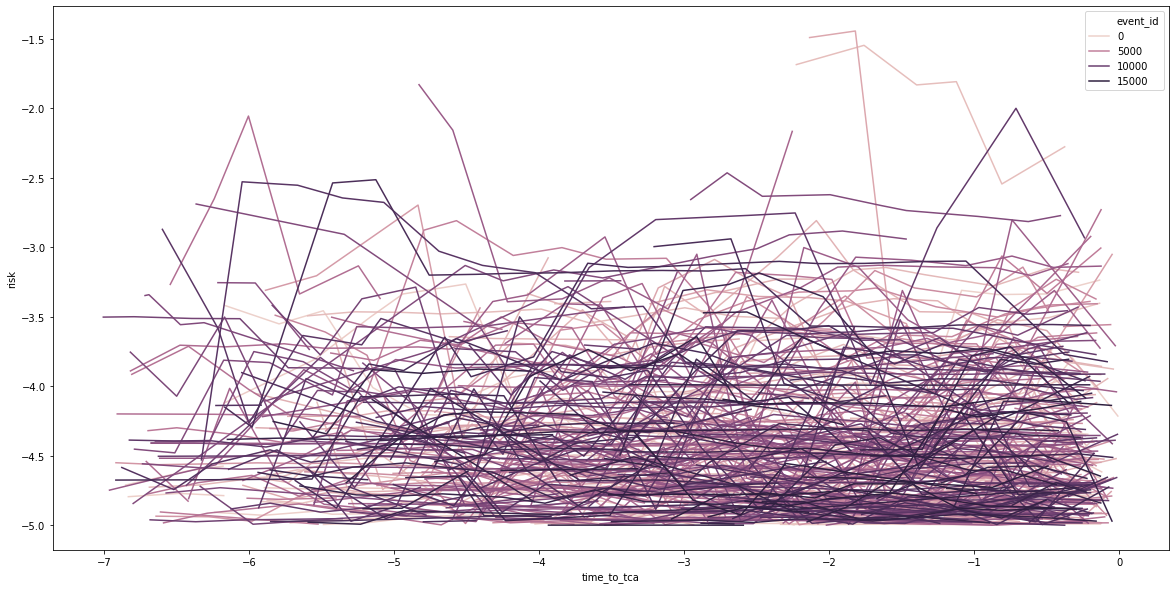

In [36]:
# Bigger plot size
plt.figure(figsize=(20, 10))

sns.lineplot(x=risky_df.time_to_tca - 7, 
             y=risky_df.risk, 
             hue=risky_df.event_id, 
             )

Still a bit messy...out of curiosity, can we try graphing just a few?


        event_id  time_to_tca  mission_id      risk  ...   F10   F3M   SSN    AP
64             5     5.119489           5 -4.792366  ...  73.0  77.0  31.0   4.0
65             5     4.750068           5 -4.208450  ...  73.0  77.0  31.0   4.0
66             5     4.087221           5 -4.049879  ...  73.0  77.0  27.0   4.0
68             5     3.417186           5 -4.802719  ...  73.0  77.0  27.0   4.0
162000     13104     6.946285           1 -4.137451  ...  92.0  76.0  59.0   3.0
162001     13104     6.238264           1 -4.083967  ...  94.0  76.0  52.0   2.0
162002     13104     5.787083           1 -4.147276  ...  94.0  76.0  52.0   2.0
162003     13104     5.630775           1 -4.141884  ...  94.0  76.0  52.0   2.0
162004     13104     5.289734           1 -4.122168  ...  91.0  76.0  33.0   3.0
162005     13104     4.764294           1 -4.116566  ...  91.0  76.0  33.0   3.0
162006     13104     4.506736           1 -4.130299  ...  86.0  76.0  21.0  44.0
162007     13104     4.26865

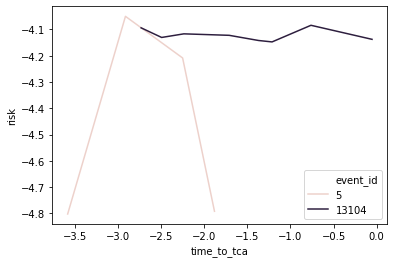

In [34]:
event_1 = risky_df[(risky_df.event_id == 13104) | (risky_df.event_id == 5)]
print(event_1)
sns.lineplot(x=event_1.time_to_tca - 7,
             y=event_1.risk,
             hue=event_1.event_id,
             legend='full')

Cool!  Now, back to work. :-)

So -- there was a suggestion to apply [Long Short-Term Memory](https://en.wikipedia.org/wiki/Long_short-term_memory) to the problem.  That seems reasonable to me; the goal is to have *something* to submit, so let's give that a try and see how well we do.  That will be the subject of the next notebook.
